# SenseWork BenchMarking

This is a benchmarking for DataCollect algorithm. It consists of two steps. <br>
Step 1 - Adding workers to DB <br>
Step 2 - Executing the algorithm and record the timing <br>
<br>
Pre: Define functions to generate random number

In [ ]:
import string
import random
def name_generator(size=6, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

def grade_generator():
    return random.randint(0,10)

def age_generator():
    return random.randint(18,120)

def location_generator(location_type):
    if (location_type == "latitude"):
        return float(random.randint(290000,330000))/10000
    if (location_type == "longitude"):
        return float(random.randint(340000,360000))/10000

## Step 1 - Adding new devices to DB

Adding Users to DummyUserTable.
Prepare for the next step to query the Data

In [146]:
import json,httplib, time
connection = httplib.HTTPSConnection('api.parse.com', 443)
connection.connect()

timeResults = []
for i in range (0,14200):
    connection.request('POST', '/1/classes/DummyUserTable', json.dumps({
           "Quality": grade_generator(),
           "Responsiveness":  grade_generator(),
           "Availability": grade_generator(),
           "Fit" : grade_generator(),
           "Location": {
             "__type": "GeoPoint",
             "latitude": location_generator("latitude"),
             "longitude": location_generator("longitude")
           },
           "ParticipateIn" : grade_generator(),
           "Feedback" : grade_generator(),
           "Grade" : grade_generator(),
           "Name" : str(i)+name_generator(10),
           "CameraMp" : grade_generator(),
           #"StartDate" : "StartDate",
           #"EndDate" : "EndDate",
           "Age" : age_generator()    
         }), {
           "X-Parse-Application-Id": "zSdMbFPkNroYsYJ1r7pz9jt9OHdVLWNsZWp4l3F7",
           "X-Parse-REST-API-Key": "XTbvW3CacGl8FUIuafboQgGz07n7sZcMHKvCTP4p",
           "Content-Type": "application/json"
         })
    
    before = time.time()
    results = json.loads(connection.getresponse().read())
    after = time.time()
    
    timeResults.append(after-before)
print "Done!"

Done!


1.A Time record graph for adding new users

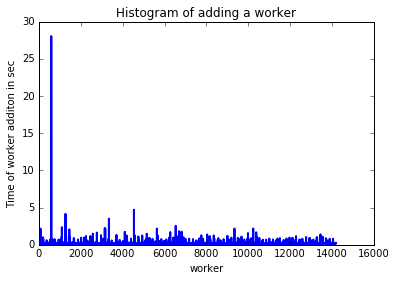

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

timeDataFrame = pd.DataFrame(timeResults)
plt.title('Histogram of adding a worker')
plt.ylabel('Time of worker additon in sec')
plt.xlabel('worker')

plt.plot(timeDataFrame, lw=2)
plt.savefig('test.png', bbox_inches='tight')

Step 1: Zoom and Mean

mean = 0.198493663627


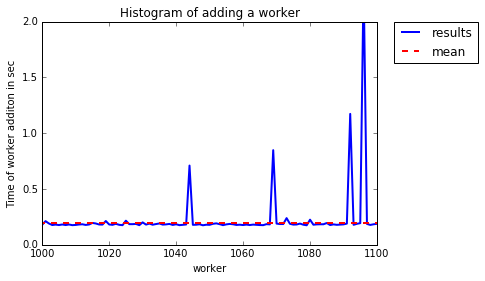

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

timeDataFrame = pd.DataFrame(timeResults)

t_mean = [np.mean(timeResults) for i in timeResults]

fig,ax = plt.subplots()
plt.title('Histogram of adding a worker')
plt.ylabel('Time of worker additon in sec')
plt.xlabel('worker')
plt.axis([1000,1100 , 0, 2])

plt.plot(timeDataFrame, 'b', label="results", lw=2)
plt.plot(t_mean, 'r--', label="mean", lw=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print "mean = " + str(np.mean(timeResults))

Step 2: Encapculate Call to Alocation Algorithem API <br>
-----------------------
<b>ExecuteAlsoApi</b><br>
iteration = number of times to call the API <br>
numberOfRequests = Number of Workers <br>
params = Parameters to use<br>
<br>
<b>Plot</b><br>
timeResults = List with all the results<br>
title = the grapth title<br>
x title <br>
y title <br>
axis = array with ranange for axis [start X, end X, start Y end Y], <b> None </b> for defaults

In [221]:
import json,httplib, time
connection = httplib.HTTPSConnection('api.parse.com', 443)
connection.connect()

def ExecuteAlsoApi(iterations, numberOfRequests, params):
    timeResList = []
    for i in range (0,iterations):
        connection.request('POST', '/1/functions/AlgorithmAllocationBenchMark', params , {
               "X-Parse-Application-Id": "zSdMbFPkNroYsYJ1r7pz9jt9OHdVLWNsZWp4l3F7",
               "X-Parse-REST-API-Key": "XTbvW3CacGl8FUIuafboQgGz07n7sZcMHKvCTP4p",
               "Content-Type": "application/json"
             })
        before = time.time()
        algoRes = connection.getresponse().read();
        after = time.time()

        timeResList.append(after - before)

        results = json.loads(algoRes)
        # print results
    print "ExecuteAlsoApi Done!"
    
    return timeResList

def Plot(timeResults,title,ylbl,xlbl,axis):
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np

    timeDataFrame = pd.DataFrame(timeResults)

    t_mean = [np.mean(timeResults) for i in timeResults]

    fig,ax = plt.subplots()
    plt.title(title)
    plt.ylabel(ylbl)
    plt.xlabel(xlbl)
    if (axis is not None):
        plt.axis(axis)

    plt.plot(timeDataFrame, 'b', label="results", lw=2)
    plt.plot(t_mean, 'r--', label="mean", lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    print "mean = " + str(np.mean(timeResults))

2.A <br>
In this benchmark I am testing execution allocation algorithm 50 times (axis x) and measure the execution time (axis y)  <br>
The measure is from the moment I send the HTTP request to the moment I receive a response <br>
of course my home internet speed and other uncontrolled parameters affects the timings and the results. <br>But I assume other users will have similar limitation. Therefore, it is interesting to see the results with those external effects.<br>
    <br>
    <u>Execution summary:</u><br>
    Number of workers in parse DB: 21K <br>
    Number of time I executed the alocation algorithm: 50 (X axis)<br>
    number of requested devices (by the requester, for each iteration):  10 <br>
    Additional parameters the requester asked for (limitations\ filters): without filters

In [223]:
params = json.dumps({
               "jobId": name_generator(),
               "numberOfRequests": numberOfRequests,
                "pushttl" : "pushttl",
                "pushmsg" : "pushmsg",
               #"fromDate":  grade_generator(),
               #"tillDate": grade_generator(),
               #"quality" : grade_generator(),
               #"geoPoint": {
               #  "__type": "GeoPoint",
               #  "latitude": location_generator("latitude"),
               #  "longitude": location_generator("longitude")
               #},
               #"radius" : (grade_generator() + 1) * 1000,
               #"minMP" : grade_generator(),
               #"age" : grade_generator(),
             })

execTimeRes_N10_NoParams = ExecuteAlsoApi(50,10, params)

ExecuteAlsoApi Done!


mean = 0.541980013847


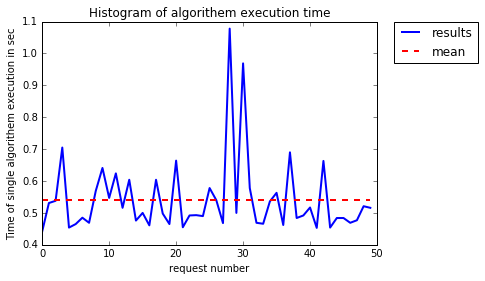

In [224]:
Plot(execTimeRes_N10_NoParams,'Histogram of algorithem execution time','Time of single algorithem execution in sec','request number', None)

2.B Adding minimal quality filter <br>
    <u>Execution summary:</u><br>
    Number of workers in parse DB: 21K <br>
    Number of time I executed the alocation algorithm: 50 (X)<br>
    number of workers devices (by the requester, for each iteration): 10 <br>
    Additional parameters the requester asked for (limitations\ filters): <br>
    - Device Minimal quality = 6              <- New

In [216]:
params = json.dumps({
               "jobId": name_generator(),
               "numberOfRequests": numberOfRequests,
                "pushttl" : "pushttl",
                "pushmsg" : "pushmsg",
               #"fromDate":  grade_generator(),
               #"tillDate": grade_generator(),
                "quality" : 6,
               #"geoPoint": {
               #  "__type": "GeoPoint",
               #  "latitude": location_generator("latitude"),
               #  "longitude": location_generator("longitude")
               #},
               #"radius" : (grade_generator() + 1) * 1000,
               #"minMP" : grade_generator(),
               #"age" : grade_generator(),
             })

execTimeRes_N10_Q6 = ExecuteAlsoApi(50,10, params)

ExecuteAlsoApi Done!


mean = 0.520720005035


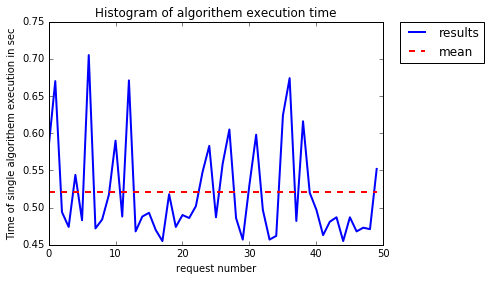

In [219]:
Plot(execTimeRes_N10_Q6,'Histogram of algorithem execution time','Time of single algorithem execution in sec','request number', None)

2.C Adding minimal age filter <br>
    <u>Execution summary:</u><br>
    Number of workers in parse DB: 21K <br>
    Number of time I executed the alocation algorithm: 50 (X)<br>
    number of workers devices (by the requester, for each iteration): 10 <br>
    Additional parameters the requester asked for (limitations\ filters): <br>
    - Device Minimal quality = 6
    - Worker Minimal Age = 40                          <-New

In [218]:
params = json.dumps({
               "jobId": name_generator(),
               "numberOfRequests": numberOfRequests,
                "pushttl" : "pushttl",
                "pushmsg" : "pushmsg",
               #"fromDate":  grade_generator(),
               #"tillDate": grade_generator(),
                "quality" : 6,
               #"geoPoint": {
               #  "__type": "GeoPoint",
               #  "latitude": location_generator("latitude"),
               #  "longitude": location_generator("longitude")
               #},
               #"radius" : (grade_generator() + 1) * 1000,
               #"minMP" : grade_generator(),
               "age" : 40,
             })

execTimeRes_N10_Q6A40 = ExecuteAlsoApi(50,10, params)

ExecuteAlsoApi Done!


mean = 0.630560002327


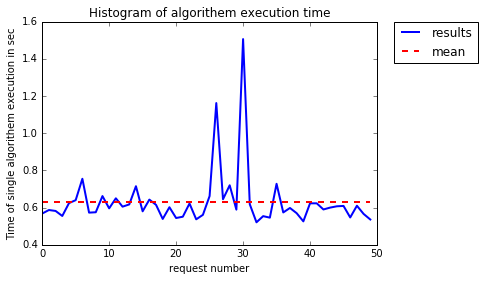

In [220]:
Plot(execTimeRes_N10_Q6A40,'Histogram of algorithem execution time','Time of single algorithem execution in sec','request number', None)

2.D Same as 3.C excep the number of workers <br>
    <u>Execution summary:</u><br>
    Number of workers in parse DB: 21K <br>
    Number of time I executed the alocation algorithm: 50 (X)<br>
    number of workers devices (by the requester, for each iteration): <b>100</b> <br>
    Additional parameters the requester asked for (limitations\ filters): <br>
    - Device Minimal quality = 6<br>
    - Worker Minimal Age = 40<br>

In [205]:
params = json.dumps({
               "jobId": name_generator(),
               "numberOfRequests": numberOfRequests,
                "pushttl" : "pushttl",
                "pushmsg" : "pushmsg",
               #"fromDate":  grade_generator(),
               #"tillDate": grade_generator(),
                "quality" : 6,
               #"geoPoint": {
               #  "__type": "GeoPoint",
               #  "latitude": location_generator("latitude"),
               #  "longitude": location_generator("longitude")
               #},
               #"radius" : (grade_generator() + 1) * 1000,
               #"minMP" : grade_generator(),
               "age" : 40,
             })

execTimeRes_N100_Q6A40 = ExecuteAlsoApi(50,100, params)

ExecuteAlsoApi Done!


mean = 0.602440009117


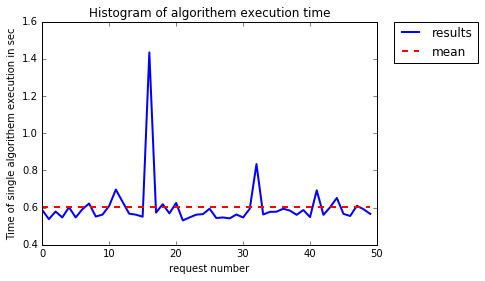

In [213]:
Plot(execTimeRes_N100_Q6A40,'Histogram of algorithem execution time','Time of single algorithem execution in sec','request number', None)